# Statistics

It is the practice or science of collecting and analysing numerical data in large quantities, especially for the purpose of inferring proportions in a whole from those in a representative sample or we can say that it refers to the mathematics and techniques with which we understand the data.

## Describing the data

Say I have a list which contains the how many friends does each person have, <code>total_friends = [85,65,20,45,16,64,88,61]</code>. This is a small list but if we have a list of millions then it will be very difficult to analyse it. So lets visualize this small one.

In [24]:
# Creating a fake data
import random

num_friends = [random.randrange(1,51,1) for _ in range(100)]

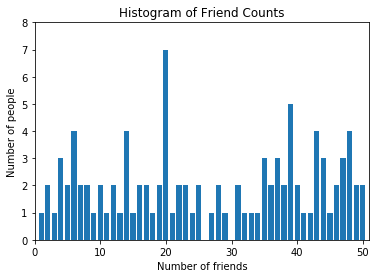

In [27]:
# Plotting the data
import matplotlib.pyplot as plt
from collections import Counter

count = Counter(num_friends)
xs = range(100)
ys = [count[x] for x in xs]
plt.bar(xs, ys)
plt.axis([0,51,0,8])
plt.title("Histogram of Friend Counts")
plt.xlabel("Number of friends")
plt.ylabel("Number of people")
plt.show()


It is still quite not that good for understanding whats going on in this graph. So now we apply some magic of statistics.

In [34]:
# Lets count the total number of people
num_people = len(num_friends)
print(f"Total Number of People: {num_people}")

# whats the max number of friends does a person have
print(f"Max number of friends of a person: {max(num_friends)}")
# whats the min number of friends does a person have
print(f"Min number of friends of a person: {min(num_friends)}")

Total Number of People: 100
Max number of friends of a person: 50
Min number of friends of a person: 1


## Central Tendencies

A central tendency is a central or typical value for a probability distribution. It may be called a center or location of the distribution.The most common measures of central tendency are the artimetic mean, median and mode.

In [43]:
# lets find the mean 
def mean(data):
    return (sum(data) / len(data))

print(f"Mean: {mean(num_friends)}")

# lets find the median
def median(data):
    sorted_data = sorted(data)
    mid_index = len(data) // 2
    
    if len(data) % 2 == 1: # if the len is odd then return the mid value
        return sorted_data[mid_index]
    else:                  # if it is even then return the average of mid_index and mid_index - 1
        low = mid_index - 1
        high = mid_index
        return (sorted_data[low] + sorted_data[high]) / 2
    
print(f"Median: {median(num_friends)}")

Mean: 26.46
Median: 25.0


A generalization of median is called <i>quantile</i>, which returns the values less than which a certain percentile of the data lies. Then we can say that median represent the value less than which 50% of the data lies.

In [54]:
def quantile(data, percentile):
    percentile_index = int(percentile * len(data))
    sorted_data = sorted(data)
    return sorted_data[percentile_index]

print(f"Quantile 0.2:  {quantile(num_friends, 0.2)}")
print(f"Quantile 0.5: {quantile(num_friends, 0.5)} and Median : {median(num_friends)}")


Quantile 0.2:  11
Quantile 0.5: 25 and Median : 25.0


<i>Mode</i> gives use the most common values in a data

In [67]:
def mode(data):
    counts = Counter(data)
    max_count = max(counts.values())
    return [value for value, count in counts.items() if count == max_count]

print(f"Mode: {mode(num_friends)}")

Mode: [20]


## Dispersion

It refers to the measure of how spread the data is. If it is near zero then the data is not spread out and if its large then our data is very spread out. We can simply calculate it by getting the difference between the max value and min value.

In [71]:
def dispersion(data):
    return max(data) - min(data)

print(f"data range: {dispersion(num_friends)}")

data range: 49


But we may have a problem here, say we have a data of range 1 to 50 and theres a lot of 25s. If we go through dispersion the we'll say that the data is spread out while it is not. So here we introduce <i>variance</i> which is a more complex measure of dispersion.

In [77]:
# deviation is the measure of how far the data is from the mean
def deviation(data):
    m = mean(data)
    return [x - m for x in data]

def sum_squares(x):
    x = [val**2 for val in x]
    return sum(x)
        
# variance
def variance(data):
    length = len(data)
    dev = deviation(data)
    return sum_squares(dev) / (length-1)
    
print(f"Variance: {variance(num_friends)}")

Variance: 227.44282828282826


Now the value that we got there is the ${S^2}$, means the unit that we have in data is squared. So to get back to the original unit we use <i>standard diviation<i/> i.e ${S}$

In [81]:
import math

def standard_deviation(data):
    return math.sqrt(variance(data))

print(f"Standard deviation: {standard_deviation(num_friends)} ")

Standard deviation: 15.081207785944343 
